# Analysis of the results for the Crypto dataset
# `crypto_volume`
## Setup

In [4]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [5]:
timestamp = 1
day_length = 24 * timestamp
train_time = 300
coins = ["BTC", "ETH", "XRP", "BNB", "SOL", "TRX", "DOGE", "BCH", "ADA"]
total_num_coins = len(coins)

## Results

In [6]:
result = torch.tensor(np.load("STGAN/crypto_volume/result/2026-02-18_13-21-03/result.npy"), dtype=torch.float)

In [7]:
result.shape

torch.Size([1393, 9, 3])

In [8]:
coin_num = 0
days = 30

<Axes: >

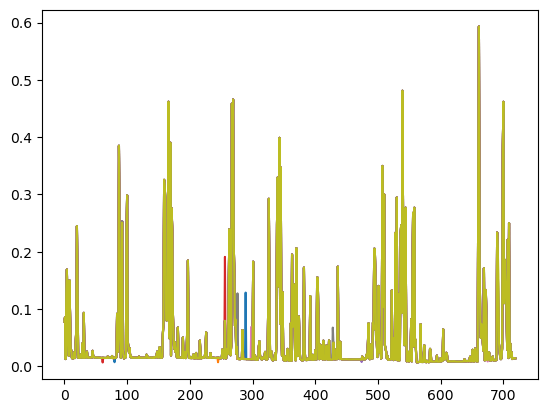

In [9]:
pd.DataFrame(result[:days*day_length, :, 0].numpy()).plot(legend=False)

<Axes: >

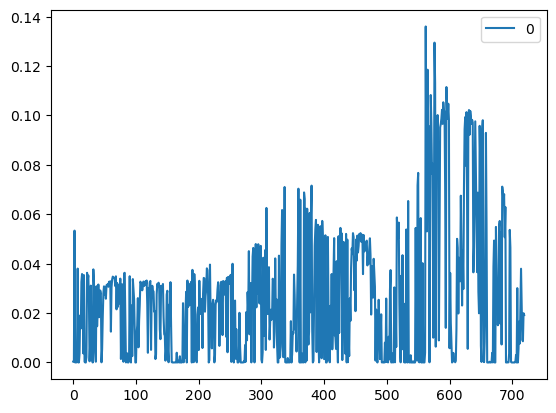

In [10]:
pd.DataFrame(result[:days*day_length, coin_num, 1].numpy()).plot()

<Axes: >

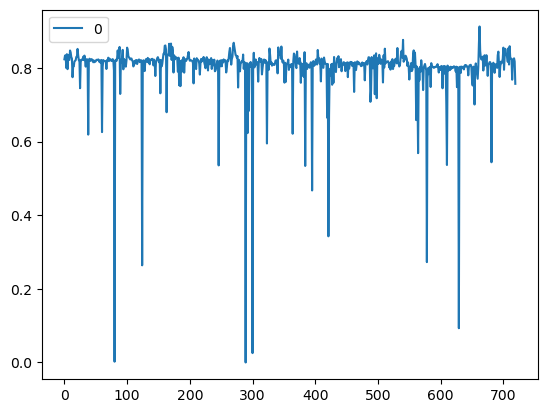

In [11]:
pd.DataFrame(result[:days*day_length, coin_num, 2].numpy()).plot()

## Anomaly scores from all the coins
Combining the two scores, from the generator and the discriminator.

In [12]:
lambda_coef = 1
for coin_num in range(result.shape[1]):
    column_name = "Score Coin " + str(coin_num)
    if coin_num == 0:
        anomaly_score = pd.DataFrame([], columns=[column_name])
    s_G = pd.DataFrame(result[:, coin_num, 0].numpy())
    s_D = pd.DataFrame(result[:, coin_num, 1].numpy()) - pd.DataFrame(result[:, coin_num, 2].numpy())
    anomaly_score[column_name] = s_G + lambda_coef * s_D

<Axes: >

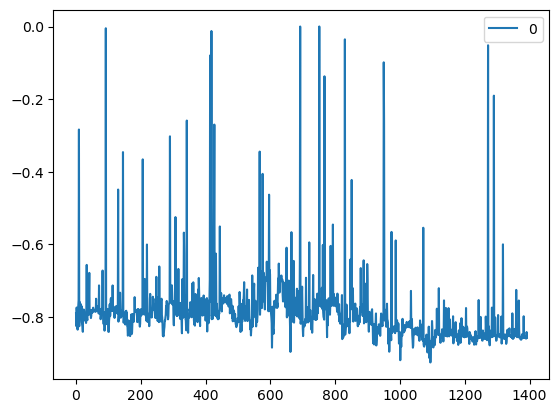

In [13]:
s_D.plot()

<Axes: >

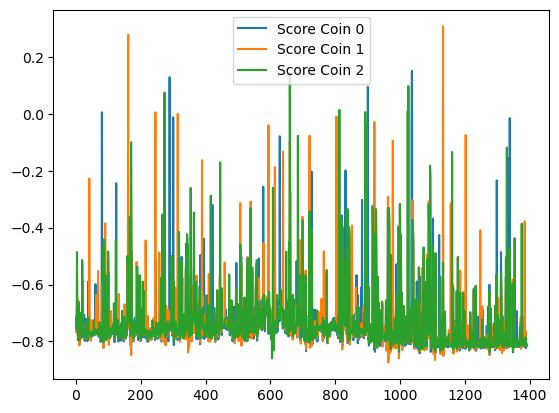

In [14]:
anomaly_score[anomaly_score.columns[:3]].plot()

In [15]:
anomaly_score

,Score Coin 0,Score Coin 1,Score Coin 2,Score Coin 3,Score Coin 4,Score Coin 5,Score Coin 6,Score Coin 7,Score Coin 8
0,-0.745128,-0.710427,-0.737517,-0.713339,-0.754302,-0.735752,-0.729833,-0.709511,-0.711816
1,-0.747954,-0.737728,-0.718481,-0.689176,-0.629416,-0.756800,-0.694987,-0.742575,-0.739788
2,-0.768282,-0.766519,-0.755617,-0.759468,-0.550995,-0.776753,-0.759473,-0.765934,-0.761539
3,-0.671947,-0.678790,-0.485538,-0.678889,-0.695102,-0.685407,-0.680196,-0.678147,-0.681785
4,-0.668535,-0.649379,-0.659428,-0.661246,-0.684796,-0.680878,-0.660985,-0.667699,-0.662014
...,...,...,...,...,...,...,...,...,...
1388,-0.800166,-0.763494,-0.785057,-0.802934,-0.805050,-0.800482,-0.801018,-0.772493,-0.799685
1389,-0.822811,-0.810396,-0.807145,-0.817589,-0.827526,-0.810775,-0.816701,-0.700721,-0.817860
1390,-0.818327,-0.815318,-0.810291,-0.772776,-0.824795,-0.813232,-0.819739,-0.818645,-0.819840
1391,-0.816580,-0.810032,-0.816104,-0.813740,-0.818472,-0.821245,-0.812187,-0.813562,-0.801384


<Axes: >

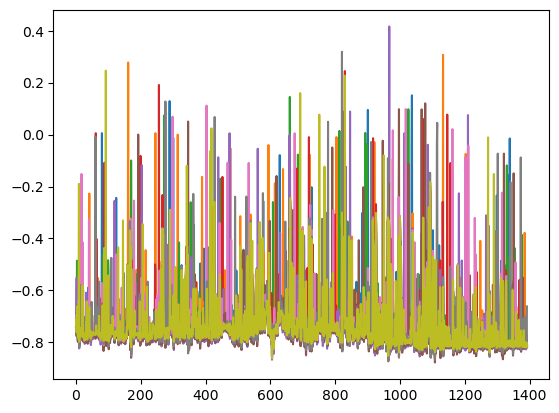

In [16]:
anomaly_score.plot(legend=False)

<Axes: title={'center': 'MSE loss'}>

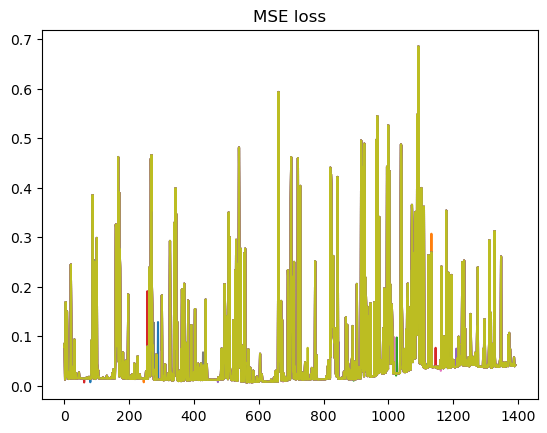

In [17]:
pd.DataFrame(result[:, :, 0].numpy()).plot(legend=False, title="MSE loss")

<Axes: title={'center': 'Real score'}>

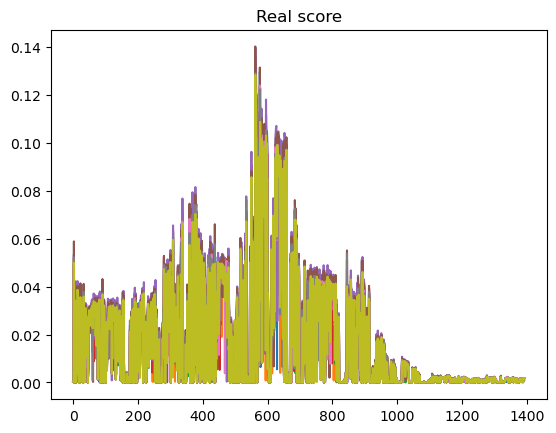

In [18]:
pd.DataFrame(result[:, :, 1].numpy()).plot(legend=False, title="Real score")

<Axes: title={'center': 'Fake score'}>

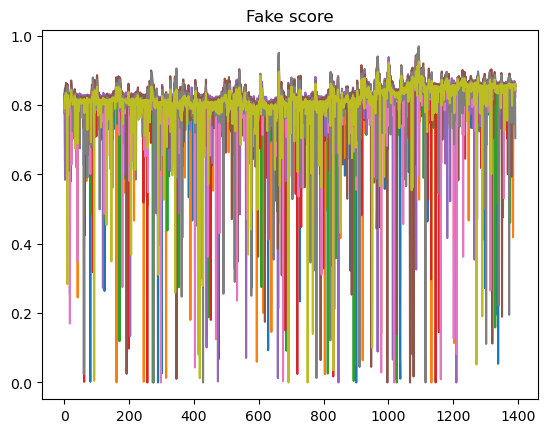

In [19]:
pd.DataFrame(result[:, :, 2].numpy()).plot(legend=False, title="Fake score")

## Selecting the top K% anomaly scores

In [20]:
K = 0.001

In [21]:
# Step 1: Flatten the DataFrame to get all values in a single array
flat_anomaly_score = anomaly_score.values.flatten()

# Step 2: Get the original coordinates
coordinates = [(i, j) for i in range(anomaly_score.shape[0]) for j in range(anomaly_score.shape[1])]

# Step 3: Sort the array while keeping track of the original coordinates
sorted_indices = np.argsort(flat_anomaly_score)[::-1]
sorted_coordinates = [coordinates[i] for i in sorted_indices]

# Print sorted coordinates
# for coord in sorted_coordinates:
#     print(coord)
#     print(anomaly_score.iloc[coord])

In [22]:
sorted_coordinates[:20]

[(967, 4),
 (821, 7),
 (1133, 1),
 (161, 1),
 (92, 8),
 (830, 3),
 (830, 8),
 (256, 3),
 (692, 8),
 (1037, 0),
 (660, 2),
 (289, 0),
 (276, 7),
 (1078, 5),
 (403, 6),
 (1018, 6),
 (997, 5),
 (1026, 2),
 (1067, 5),
 (901, 0)]

In [23]:
pd.Series([x[0] for x in sorted_coordinates[:20]]).nunique()

19

In [24]:
len(sorted_coordinates)

12537

<Axes: >

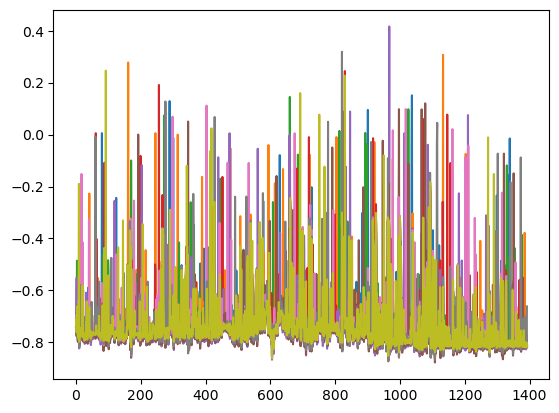

In [25]:
anomaly_score.plot(legend=False)

<Axes: >

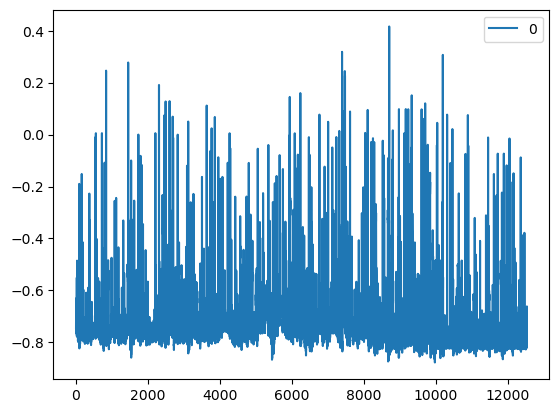

In [26]:
pd.DataFrame(flat_anomaly_score).plot()

In [27]:
head = int(np.floor(K * len(flat_anomaly_score)))

In [28]:
anomalies = sorted_coordinates[:head]
anomalies

[(967, 4),
 (821, 7),
 (1133, 1),
 (161, 1),
 (92, 8),
 (830, 3),
 (830, 8),
 (256, 3),
 (692, 8),
 (1037, 0),
 (660, 2),
 (289, 0)]

In [29]:
minutes = pd.Series([minutes for minutes, coin_nums in anomalies])
coin_nums = pd.Series([coin_nums for minutes, coin_nums in anomalies])

In [30]:
minutes

0      967
1      821
2     1133
3      161
4       92
5      830
6      830
7      256
8      692
9     1037
10     660
11     289
dtype: int64

In [31]:
coin_nums

0     4
1     7
2     1
3     1
4     8
5     3
6     8
7     3
8     8
9     0
10    2
11    0
dtype: int64

In [32]:
assert(len(coins) == total_num_coins)
coins

['BTC', 'ETH', 'XRP', 'BNB', 'SOL', 'TRX', 'DOGE', 'BCH', 'ADA']

In [33]:
day_tmp, tmp = divmod(minutes*int(60/timestamp), 60*24)
days = day_tmp + 1
clock_hour, clock_min = divmod(tmp, 60)

for i, day in enumerate(days):
    print(f"Anomaly at: Coin {coins[coin_nums[i]]}, day #{day} of test, at {clock_hour[i]}:{clock_min[i]}.")

Anomaly at: Coin SOL, day #41 of test, at 7:0.
Anomaly at: Coin BCH, day #35 of test, at 5:0.
Anomaly at: Coin ETH, day #48 of test, at 5:0.
Anomaly at: Coin ETH, day #7 of test, at 17:0.
Anomaly at: Coin ADA, day #4 of test, at 20:0.
Anomaly at: Coin BNB, day #35 of test, at 14:0.
Anomaly at: Coin ADA, day #35 of test, at 14:0.
Anomaly at: Coin BNB, day #11 of test, at 16:0.
Anomaly at: Coin ADA, day #29 of test, at 20:0.
Anomaly at: Coin BTC, day #44 of test, at 5:0.
Anomaly at: Coin XRP, day #28 of test, at 12:0.
Anomaly at: Coin BTC, day #13 of test, at 1:0.


## Plotting the anomalies for a specific coin

In [34]:
# Choose the coin
coin_num = 0

In [35]:
minutes[coin_nums == coin_num]

9     1037
11     289
dtype: int64

In [36]:
# Read again, all the training data
data = torch.tensor(np.load("STGAN/crypto_volume/data/data.npy"), dtype=torch.float)
df = pd.DataFrame(data[train_time*day_length:, coin_num, 0, 0])
df.columns = ["Adj Close"]

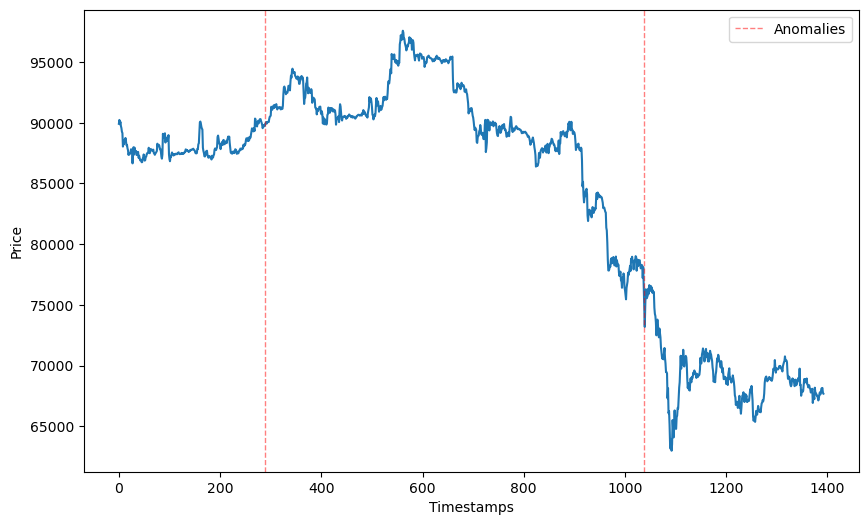

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(df["Adj Close"])

for i, time in enumerate(minutes[coin_nums == coin_num]):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


plt.xlabel("Timestamps")
plt.ylabel("Price")
plt.legend()
plt.show()